# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Описание данных

market_file.csv  

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
id — номер покупателя в корпоративной базе данных.  
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».  
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».  
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.  
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.  
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.  
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.  
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.  
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.  
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.  
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.  
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.  
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  

market_money.csv  

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
id — номер покупателя в корпоративной базе данных.  
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
Выручка — сумма выручки за период.  

market_time.csv  

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.  
id — номер покупателя в корпоративной базе данных.  
Период — название периода, во время которого зафиксировано общее время.  
минут — значение времени, проведённого на сайте, в минутах.  

money.csv

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  
id — номер покупателя в корпоративной базе данных.  
Прибыль — значение прибыли.  

# Ход работы

Шаг 1. Загрузка данных  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Объединение таблиц   
Шаг 5. Корреляционный анализ  
Шаг 6. Использование пайплайнов  
Шаг 7. Анализ важности признаков  
Шаг 8. Сегментация покупателей  
Шаг 9. Общий вывод  

## Загрузка данных

In [ ]:
!pip install phik -q
!pip install scikit-learn==1.1.3 -q
!pip install shap -q
!pip install matplotlib==3.5.1 -q

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [4]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [5]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [6]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [7]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


Загрузили библиотеки и файлы, объявили константы.

## Предобработка данных

In [8]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [10]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [11]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].str.replace('стандартт', 'стандарт')

In [12]:
market_file['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [13]:
market_file['Популярная_категория'] = market_file['Популярная_категория'] \
.str.replace('Косметика и аксесуары', 'Косметика и аксессуары')

In [14]:
market_file['Тип сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [15]:
market_file.duplicated().sum()

0

In [16]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [17]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [18]:
market_money.duplicated().sum()

0

In [19]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [20]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [21]:
market_time['Период'] = market_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

In [22]:
market_time.duplicated().sum()

0

In [23]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [24]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [25]:
money.duplicated().sum()

0

Провели предобработку данных. Исправили ошибки в данных, проверили наличие дубликатов, проверили типы данных. Пропусков и дубликатов не было обнаружено.

## Исследовательский анализ данных

In [26]:
# Отбираем клиентов с покупательской активностью не менее 3 месяцев.
clients_id = market_money.loc[market_money['Выручка'] == 0, 'id'].unique()
market_file = market_file[~market_file['id'].isin(clients_id)]
market_money = market_money[~market_money['id'].isin(clients_id)]
market_time = market_time[~market_time['id'].isin(clients_id)]
money = money[~money['id'].isin(clients_id)]

In [27]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


In [28]:
quant_columns = ['Длительность','Акционные_покупки','Маркет_актив_6_мес']

In [29]:
quant = market_file.drop(['id','Длительность','Акционные_покупки','Маркет_актив_6_мес'], axis=1) \
.select_dtypes(include='number').columns.tolist()

In [30]:
market_file.drop('id', axis=1).describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


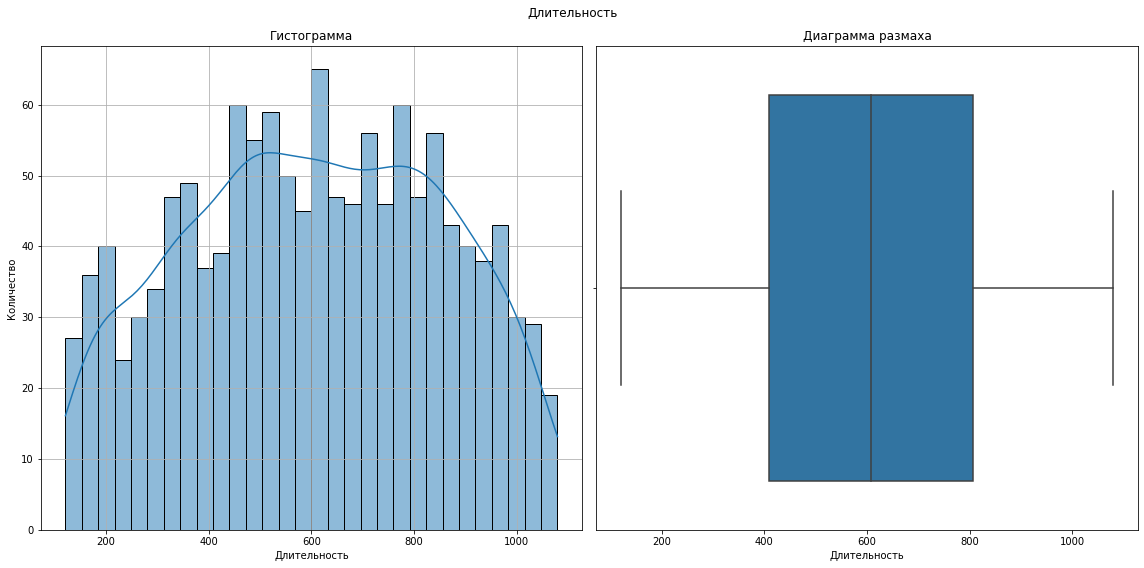

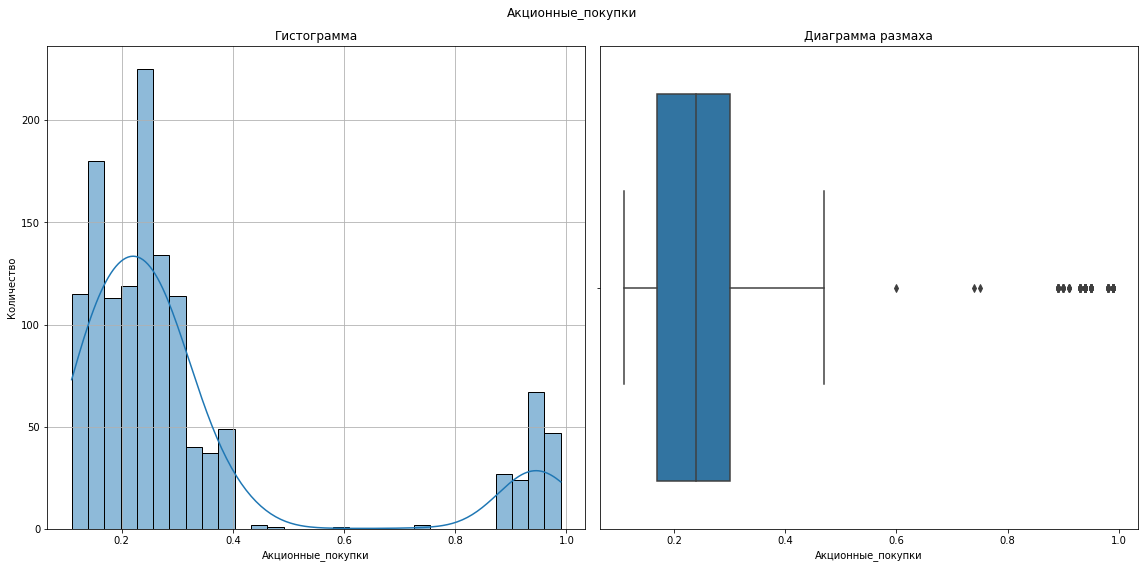

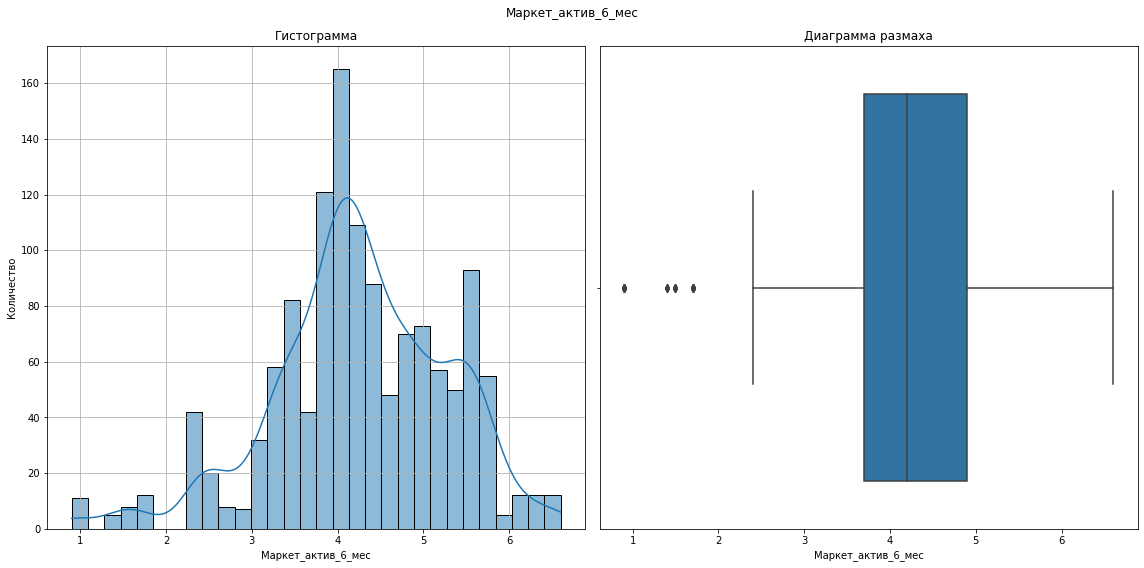

In [31]:
for i in quant_columns:
    fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
    sns.histplot(data = market_file,x = i, ax=axs[0], bins = 30, kde=True)
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Количество')
    axs[0].set_title('Гистограмма')
    axs[0].grid(True)
    sns.boxplot(data = market_file,x = i, ax=axs[1])
    axs[1].set_xlabel(i)
    axs[1].set_title('Диаграмма размаха')
    fig.suptitle(i)
    plt.tight_layout()
    plt.show()

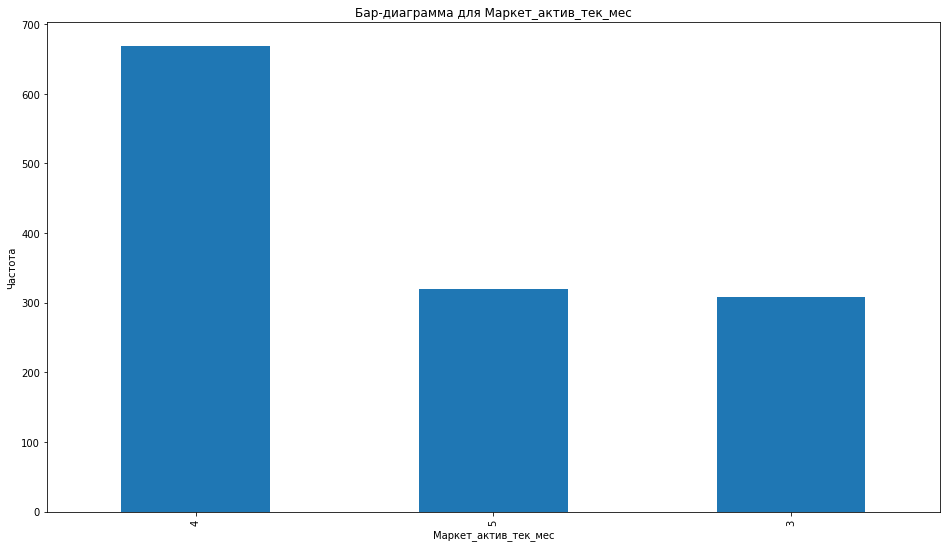

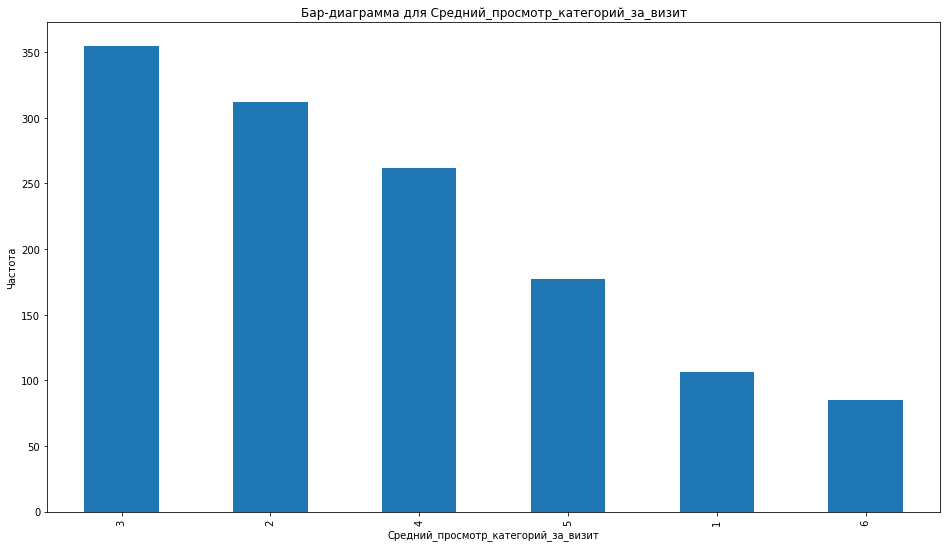

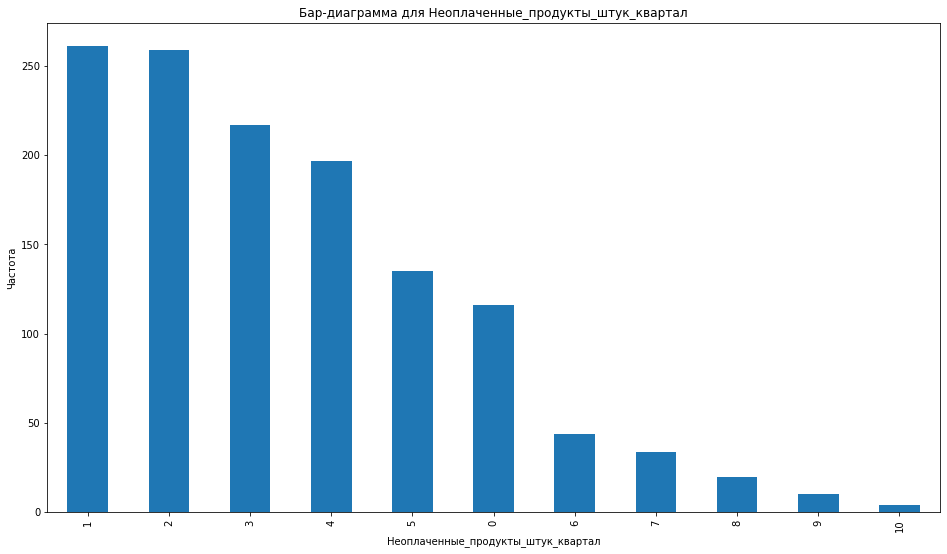

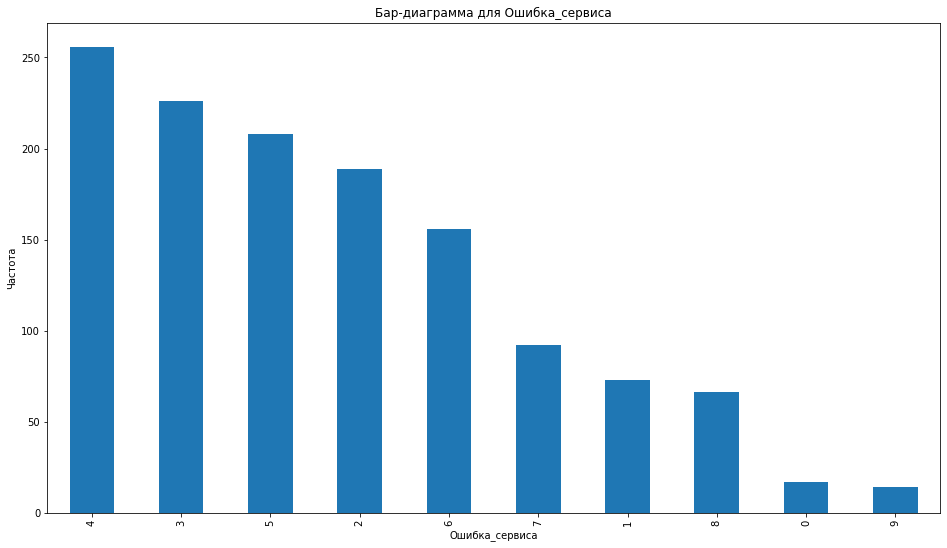

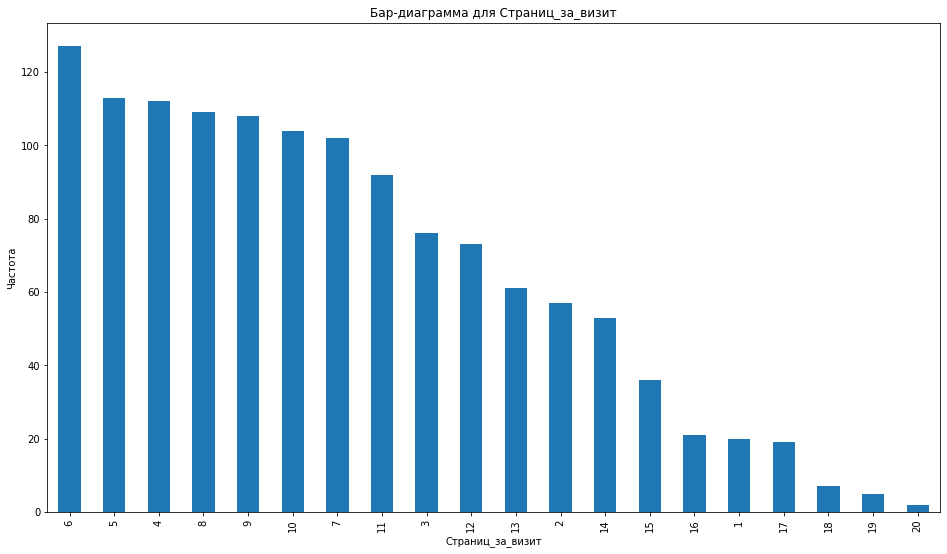

In [32]:
for i in quant:
    market_file[i].value_counts().plot(kind='bar', title=i, figsize=(16,9))
    plt.title(f'Бар-диаграмма для {i}')
    plt.xlabel(i)
    plt.ylabel('Частота')
    plt.show()

In [33]:
cat_columns = market_file.select_dtypes(exclude='number').columns.tolist()

In [34]:
cat_columns

['Покупательская активность',
 'Тип сервиса',
 'Разрешить сообщать',
 'Популярная_категория']

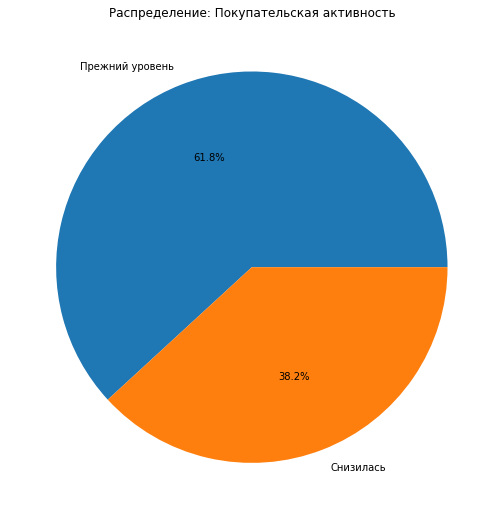

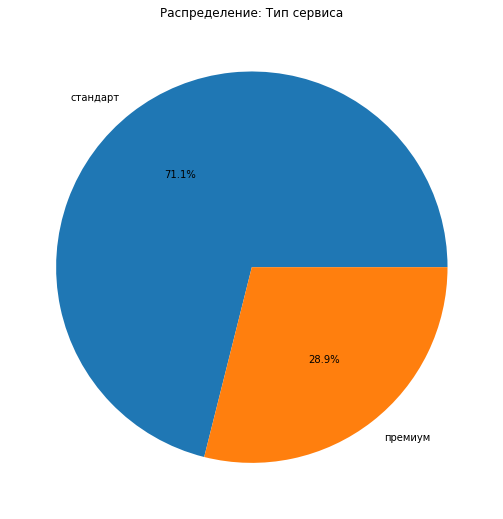

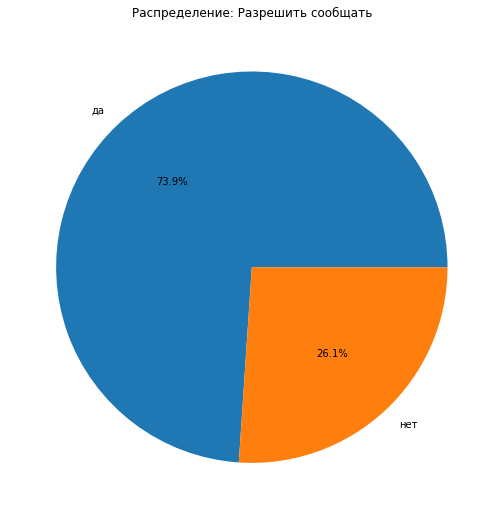

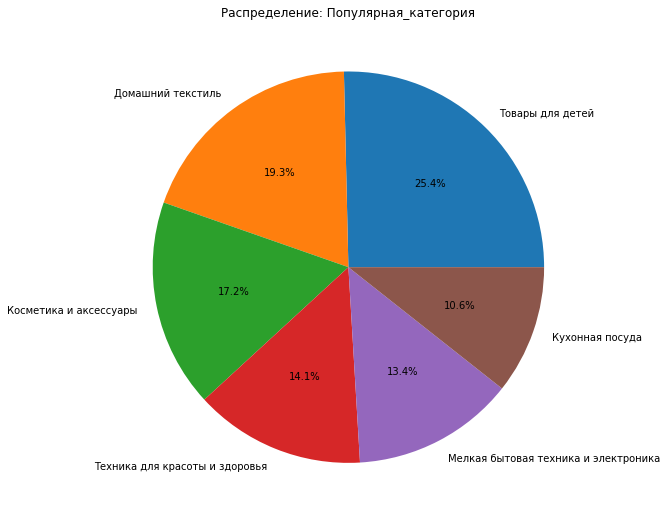

In [35]:
for i in cat_columns:
    plt.figure(figsize=(15, 9))
    market_file[i].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Распределение: {i}')
    plt.ylabel('')
  

In [36]:
market_money.drop('id',axis=1).describe()

,Выручка
count,3891.000000
mean,5033.718890
std,1768.471286
min,2758.700000
25%,4592.000000
50%,4959.000000
75%,5363.200000
max,106862.200000


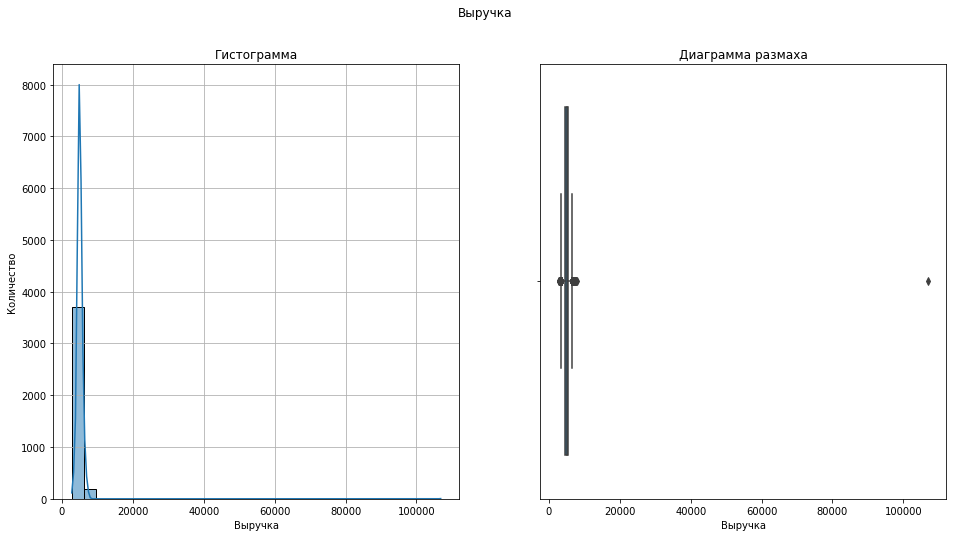

In [37]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_money,x = 'Выручка', ax=axs[0], bins = 30, kde=True)
axs[0].set_xlabel('Выручка')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
axs[0].grid(True)
sns.boxplot(data = market_money,x = 'Выручка', ax=axs[1])
axs[1].set_xlabel('Выручка')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Выручка')

plt.show()

Замечен выброс, избавимся от него и перестроим график.

In [38]:
market_money = market_money.query('Выручка<50000')

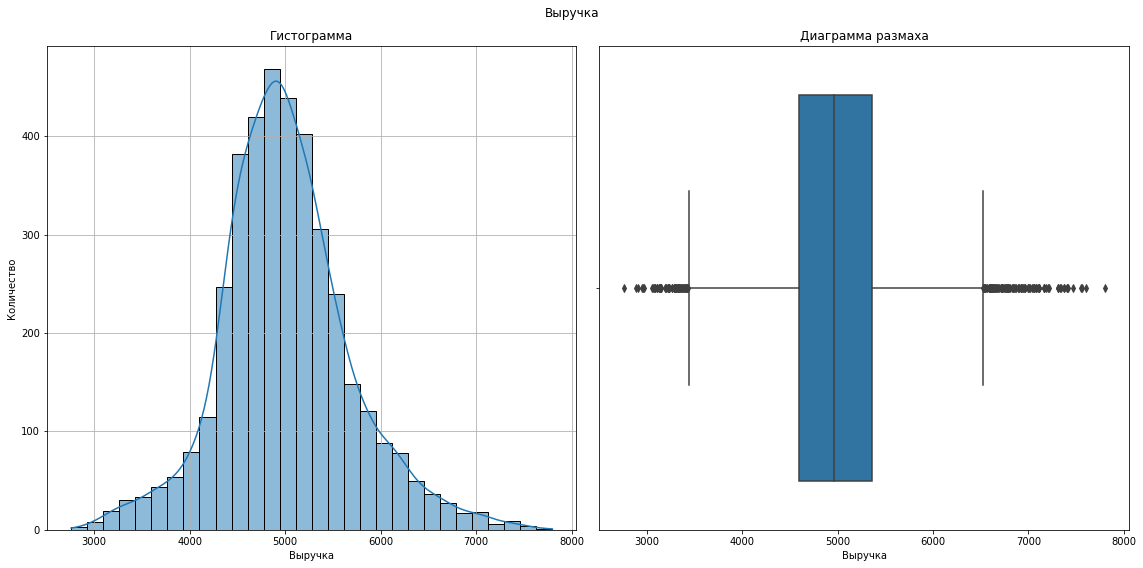

In [39]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_money,x = 'Выручка', ax=axs[0], bins = 30, kde=True)
axs[0].set_xlabel('Выручка')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
axs[0].grid(True)
sns.boxplot(data = market_money,x = 'Выручка', ax=axs[1])
axs[1].set_xlabel('Выручка')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Выручка')
plt.tight_layout()
plt.show()

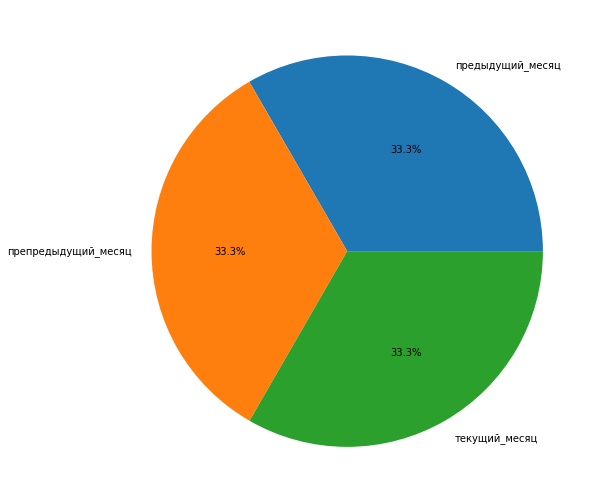

In [40]:
market_money['Период'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(15,9))
plt.ylabel('');
plt.show()

In [41]:
market_time.drop('id', axis=1).describe()

,минут
count,2594.000000
mean,13.340401
std,4.081999
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


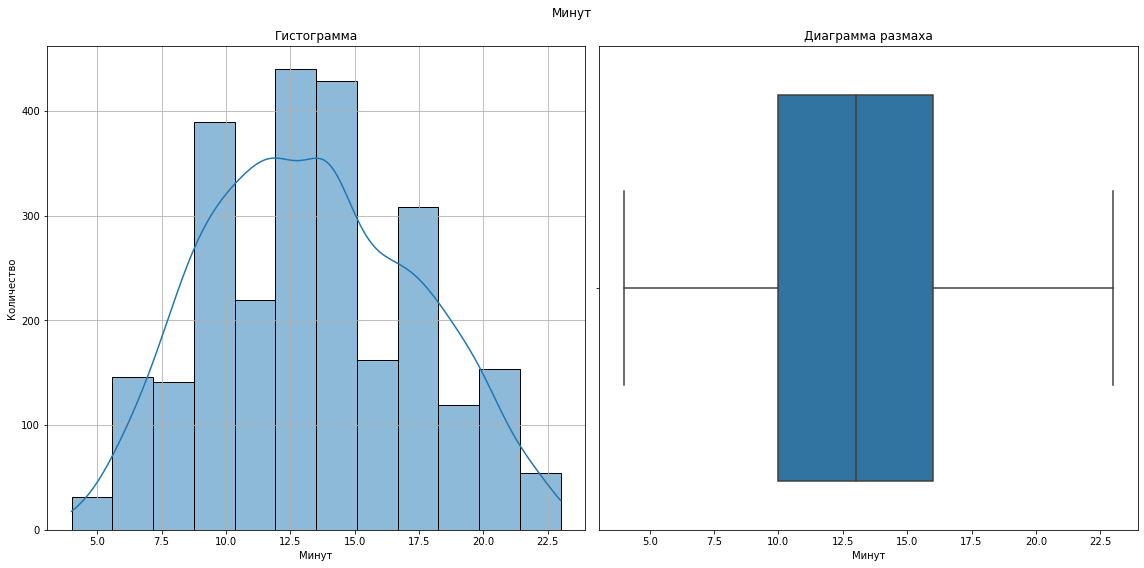

In [42]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = market_time,x = 'минут', ax=axs[0], bins = 12, kde=True)
axs[0].set_xlabel('Минут')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
axs[0].grid(True)
sns.boxplot(data = market_time,x = 'минут', ax=axs[1])
axs[1].set_xlabel('Минут')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Минут')
plt.tight_layout()
plt.show()

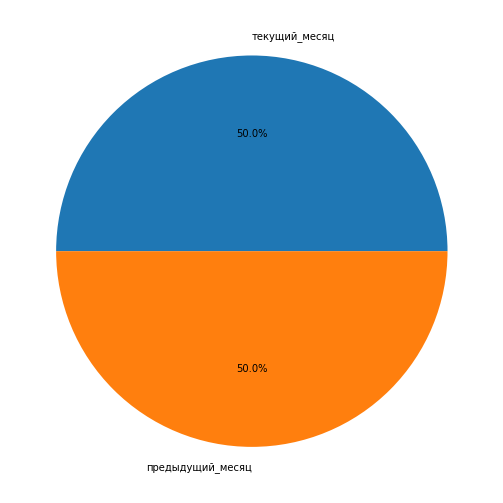

In [43]:
market_time['Период'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(15,9))
plt.ylabel('');
plt.show()

In [44]:
money.drop('id', axis=1).describe()

,Прибыль
count,1297.000000
mean,3.997610
std,1.010813
min,0.860000
25%,3.300000
50%,4.040000
75%,4.670000
max,7.430000


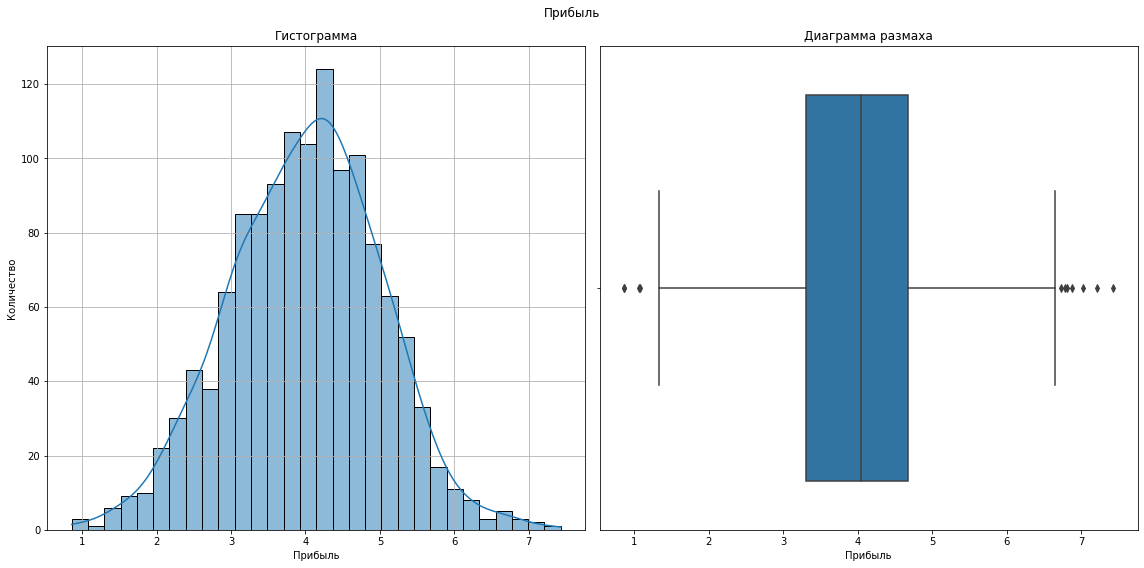

In [45]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sns.histplot(data = money,x = 'Прибыль', ax=axs[0], bins = 30, kde=True)
axs[0].set_xlabel('Прибыль')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
axs[0].grid(True)
sns.boxplot(data = money,x = 'Прибыль', ax=axs[1])
axs[1].set_xlabel('Прибыль')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Прибыль')
plt.tight_layout()
plt.show()

Самыми популярными являются группы "Товары для детей" и "Домашний текстиль", так как они так популярны возможно компании стоит делать акцент на развитие остатющих направлений "Кухонная посуда" и "Мелкая бытовая техника и электроника". Доля клиентов сниживших свою покупательскую активность составляет 38.2%, компании стоит подробнее изучить их поведение. Так же почти все клиенты сталкиваются с большим количеством ошибок сервиса, компании стоит поработать над технической частью сайта.

Были построены графики для всех количественных и категориальных признаков для каждого датасета. Так же были проанализированы минимальные, максимальные, средние и медианные значения для каждого из количественных признаков, изучено соотношение для категориальных признаков. Ликвидирован один выброс.

## Объединение таблиц

In [46]:
a = market_money.query('Период=="препредыдущий_месяц"')\
.drop('Период',axis=1).rename(columns={'Выручка':'выручка_препредыдущий_месяц'})

In [47]:
b = market_money.query('Период=="предыдущий_месяц"')\
.drop('Период',axis=1).rename(columns={'Выручка':'выручка_предыдущий_месяц'})

In [48]:
c = market_money.query('Период=="текущий_месяц"')\
.drop('Период',axis=1).rename(columns={'Выручка':'выручка_текущий_месяц'})

In [49]:
d = market_time.query('Период=="предыдущий_месяц"')\
.drop('Период',axis=1).rename(columns={'минут':'минут_предыдущий_месяц'})

In [50]:
e = market_time.query('Период=="текущий_месяц"')\
.drop('Период',axis=1).rename(columns={'минут':'минут_текущий_месяц'})

In [51]:
data = market_file.merge(a, on='id') \
                  .merge(b, on='id') \
                  .merge(c, on='id') \
                  .merge(d, on='id') \
                  .merge(e, on='id')

In [52]:
data.set_index('id', inplace=True)

In [53]:
data.isna().sum()

Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

Объединены необходимые данные в один датасет Data.

## Корреляционный анализ

In [54]:
data.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [55]:
interval_cols = ['Акционные_покупки', 'Маркет_актив_6_мес', 
                 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц','выручка_текущий_месяц']

In [56]:
data.phik_matrix(interval_cols=interval_cols).style.background_gradient(cmap ='coolwarm').set_precision(4)

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
Покупательская активность,1.0000,0.1299,0.0000,0.5448,0.0000,0.0000,0.5063,0.2997,0.5396,0.4050,0.2242,0.7473,0.4974,0.2246,0.1972,0.6044,0.5700
Тип сервиса,0.1299,1.0000,0.2900,0.0899,0.0453,0.6119,0.0300,0.0708,0.1854,0.1130,0.0795,0.0878,0.0697,0.0000,0.1242,0.1212,0.0618
Разрешить сообщать,0.0000,0.2900,1.0000,0.0000,0.0526,0.6072,0.0122,0.0737,0.0704,0.1625,0.0218,0.0971,0.0000,0.0808,0.0609,0.0635,0.0000
Маркет_актив_6_мес,0.5448,0.0899,0.0000,1.0000,0.0799,0.0000,0.2796,0.1504,0.2068,0.2177,0.1424,0.3760,0.3153,0.1555,0.0398,0.3228,0.3315
Маркет_актив_тек_мес,0.0000,0.0453,0.0526,0.0799,1.0000,0.6758,0.0000,0.1362,0.2466,0.1429,0.1169,0.0000,0.0000,0.0518,0.0000,0.1669,0.0799
Длительность,0.0000,0.6119,0.6072,0.0000,0.6758,1.0000,0.0000,0.7576,0.7669,0.8508,0.6793,0.5141,0.1516,0.0000,0.1132,0.2130,0.6701
Акционные_покупки,0.5063,0.0300,0.0122,0.2796,0.0000,0.0000,1.0000,0.1224,0.1992,0.2467,0.0000,0.3507,0.2264,0.0607,0.0711,0.3141,0.2873
Популярная_категория,0.2997,0.0708,0.0737,0.1504,0.1362,0.7576,0.1224,1.0000,0.2261,0.2547,0.0000,0.1776,0.0435,0.2521,0.2372,0.2187,0.1138
Средний_просмотр_категорий_за_визит,0.5396,0.1854,0.0704,0.2068,0.2466,0.7669,0.1992,0.2261,1.0000,0.3349,0.0703,0.2938,0.1768,0.0984,0.0926,0.2192,0.2363
Неоплаченные_продукты_штук_квартал,0.4050,0.1130,0.1625,0.2177,0.1429,0.8508,0.2467,0.2547,0.3349,1.0000,0.0000,0.3108,0.1893,0.1935,0.1660,0.1943,0.1582


Проведен корреляционный анализ. Мультиколлинерность отсутсвует. Было выявлено, что Покупательская активность наиболее взаимосвязана с Страниц_за_визит, минут_предыдущий_месяц и минут_текущий_месяц, Маркет_актив_6_мес. Так же сильную взаимосвязь имеют признаки выручка_предыдущий_месяц с выручка_текущий_месяц и Неоплаченные_продукты_штук_квартал с Длительность.

## Использование пайплайнов

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1296 non-null   object 
 1   Тип сервиса                          1296 non-null   object 
 2   Разрешить сообщать                   1296 non-null   object 
 3   Маркет_актив_6_мес                   1296 non-null   float64
 4   Маркет_актив_тек_мес                 1296 non-null   int64  
 5   Длительность                         1296 non-null   int64  
 6   Акционные_покупки                    1296 non-null   float64
 7   Популярная_категория                 1296 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  Ошибка_сервиса                       1296 non-null   int64  
 11  Страниц_за_визит       

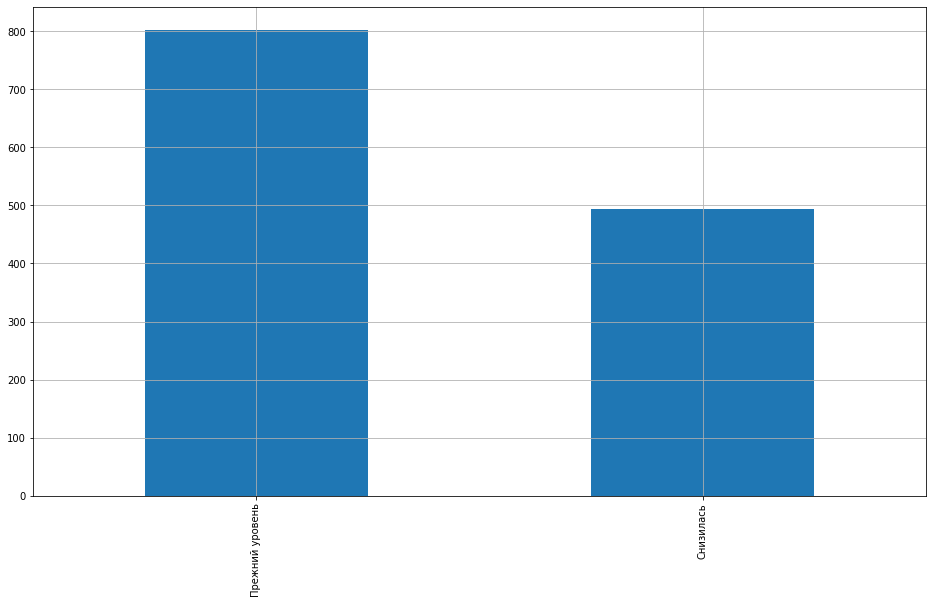

In [58]:
data['Покупательская активность'].value_counts().plot(kind='bar',figsize=(16,9),grid=True);

В данных наблюдается дисбаланс классов, поэтому в дальнейщем будем использовать стратификацию.

In [59]:
ohe_columns = ['Разрешить сообщать','Популярная_категория']
ord_columns = ['Тип сервиса']
num_columns = data.select_dtypes(include='number').columns.tolist()

In [60]:
X = data.drop('Покупательская активность', axis = 1)
y = data['Покупательская активность']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [62]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))        
    ]
)

In [63]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [64]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [65]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [66]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,20),
        'models__max_features': range(2,20),
        'models__min_samples_leaf': range(2,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear'
        )],
        'models__C': range(1,10),
        'models__penalty': ['l1', 'l2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVM()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [67]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_iter=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                        

In [68]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['params', 'std_test_score', 'param_models', 'mean_test_score']
].sort_values('mean_test_score', ascending=False).head(3)

,params,std_test_score,param_models,mean_test_score
160,"{'preprocessor__num': StandardScaler(), 'models__penalty': 'l1', 'models__C': 8, 'models': LogisticRegression(C=8, penalty='l1', random_state=42, solver='liblinear')}",0.018314,"LogisticRegression(C=8, penalty='l1', random_state=42, solver='liblinear')",0.896283
21,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 6, 'models__max_features': 14, 'models__max_depth': 19, 'models': DecisionTreeClassifier(random_state=42)}",0.022915,DecisionTreeClassifier(random_state=42),0.878135
85,"{'preprocessor__num': 'passthrough', 'models__min_samples_leaf': 8, 'models__max_features': 17, 'models__max_depth': 19, 'models': DecisionTreeClassifier(random_state=42)}",0.029753,DecisionTreeClassifier(random_state=42),0.876707


In [69]:
y_pred = randomized_search.predict_proba(X_test)[:, 1]

In [70]:
roc_auc_score(y_test, y_pred)

0.915867815394572

На данном шаге были построены и использованы пайплайны. Метрикой была выбрана ROC-AUC. ROC-AUC устойчив к дисбалансу классов, потому что оценивает качество ранжирования вероятностей, а не просто количество правильно предсказанных классов. На RandomizedSearchCV было проведено 200 итераций с различными гиперпараметрами и среди моделей (DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVM) лучшей стала LogisticRegression с penalty='l1', C=8, solver='liblinear', StandardScaler, значение ROC-AUC на кросс-валидации 0.8962, что является хорошим результатом. На тестовых же данных модель продемонстрировала значение метрики равное 0.9158.

## Анализ важности признаков

In [71]:
best_model = randomized_search.best_estimator_.named_steps['models']

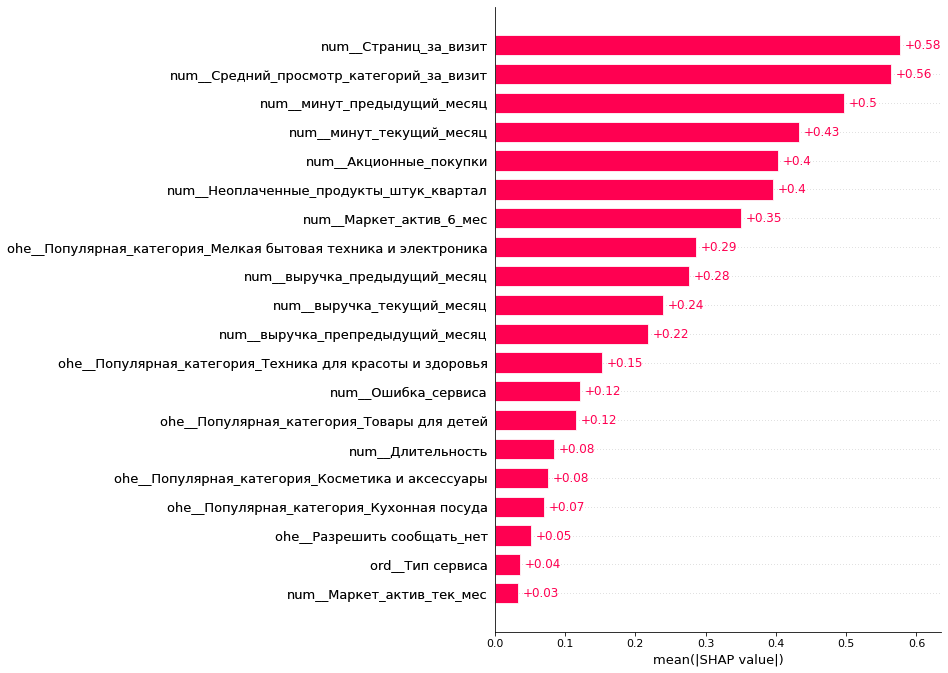

In [72]:
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

X_train_transformed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
X_test_transformed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

explainer = shap.LinearExplainer(best_model, X_train_transformed, feature_names = feature_names)
shap_values = explainer(X_test_transformed)
shap.plots.bar(shap_values, max_display=21)
plt.show()

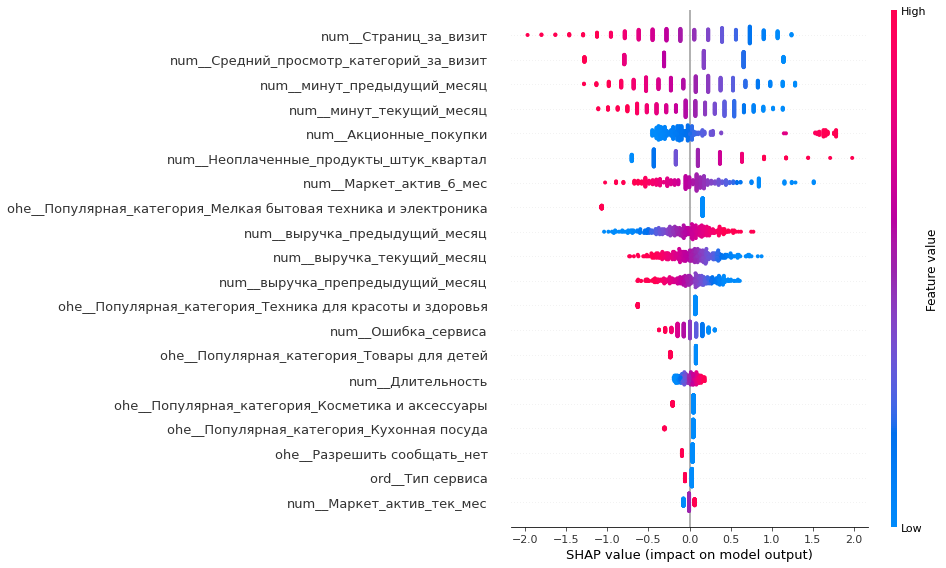

In [73]:
shap.plots.beeswarm(shap_values,max_display=21) 

Наиболее важные признаки:  
Страниц_за_визит  
Средний_просмотр_категорий_за_визит  
Минут_предыдущий_месяц  
Наименее важные признаки:  
Маркет_актив_тек_мес  
Тип сервиса  
Разрешить сообщать_нет  
При принятии бизнес-решений компании стоит активнее изучать клиентов, которые много времени проводят на их сайте, т.к. Страниц_за_визит, Средний_просмотр_категорий_за_визит, Минут_предыдущий_месяц являются наиболее важными признаками, возможно, для таких клиентов стоит делать персонализированные предложения, так же можно заметить что Маркет_актив_тек_мес являтся самым малозначимым признаком, но Маркет_актив_6_мес имеется достаточно большое влияние, значит скорее всего присутствует лаг и со временем маркетинговые компании и рассылки начинают приносить свои плоды.

## Сегментация покупателей

In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 216161 to 215670
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип сервиса                          324 non-null    object 
 1   Разрешить сообщать                   324 non-null    object 
 2   Маркет_актив_6_мес                   324 non-null    float64
 3   Маркет_актив_тек_мес                 324 non-null    int64  
 4   Длительность                         324 non-null    int64  
 5   Акционные_покупки                    324 non-null    float64
 6   Популярная_категория                 324 non-null    object 
 7   Средний_просмотр_категорий_за_визит  324 non-null    int64  
 8   Неоплаченные_продукты_штук_квартал   324 non-null    int64  
 9   Ошибка_сервиса                       324 non-null    int64  
 10  Страниц_за_визит                     324 non-null    int64  
 11  выручка_препредыдущий_ме

In [75]:
# выберем сегмент клиентов, у которых высокая доля вероястности снижения покупательской активности
#при этом прибыль продавца от клиентов выше, чем средняя  
predicted = randomized_search.predict_proba(X_test)[:, 1]
X_test['вероятность'] = predicted
segment = X_test.merge(money, on = 'id').query("вероятность>=0.7 and Прибыль>Прибыль.mean()")

In [76]:
segment.head()

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность,Прибыль
12,215375,премиум,да,3.0,4,558,0.89,Товары для детей,3,3,7,4,4715.0,5253.5,5633.1,8,9,0.971452,4.18
18,215452,стандарт,да,3.8,4,756,0.90,Товары для детей,2,3,6,4,4963.0,4045.0,4206.2,11,10,0.955549,4.50
21,215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,4267.0,5059.0,5018.7,5,7,0.922322,5.64
38,215496,премиум,да,4.0,4,684,0.40,Техника для красоты и здоровья,1,6,2,4,4896.0,5020.0,5237.1,11,11,0.944746,4.64
47,215666,стандарт,да,3.5,5,703,0.22,Товары для детей,2,2,8,2,4138.0,4945.0,5150.4,6,10,0.951882,4.02


In [77]:
interval_cols = ['Акционные_покупки', 'Маркет_актив_6_мес', 'Прибыль', 'вероятность'
                 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц','выручка_текущий_месяц']

In [78]:
segment.drop('id', axis = 1).phik_matrix().style.background_gradient(cmap ='coolwarm').set_precision(4)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'вероятность', 'Прибыль']


,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность,Прибыль
Тип сервиса,1.0000,0.0000,0.0902,0.0000,0.4944,0.0560,0.2503,0.0000,0.3378,0.3759,0.0000,0.0000,0.0000,0.5163,0.1653,0.4685,0.4693,0.1547
Разрешить сообщать,0.0000,1.0000,0.0000,0.1084,0.4911,0.0000,0.1152,0.0000,0.0000,0.0000,0.1428,0.5706,0.3700,0.0000,0.1899,0.3035,0.0000,0.4088
Маркет_актив_6_мес,0.0902,0.0000,1.0000,0.6124,0.1553,0.0000,0.3009,0.0000,0.4510,0.3378,0.0000,0.0000,0.0000,0.0000,0.6628,0.5132,0.0000,0.0000
Маркет_актив_тек_мес,0.0000,0.1084,0.6124,1.0000,0.1334,0.0000,0.0000,0.0000,0.4452,0.3195,0.3245,0.1277,0.0000,0.0000,0.4581,0.3715,0.0000,0.0000
Длительность,0.4944,0.4911,0.1553,0.1334,1.0000,0.0215,0.0000,0.0000,0.5822,0.0000,0.0000,0.5403,0.2003,0.5370,0.0000,0.5392,0.1383,0.0000
Акционные_покупки,0.0560,0.0000,0.0000,0.0000,0.0215,1.0000,0.2205,0.2444,0.0000,0.1175,0.1001,0.0000,0.0000,0.2453,0.1691,0.0000,0.4421,0.0000
Популярная_категория,0.2503,0.1152,0.3009,0.0000,0.0000,0.2205,1.0000,0.0000,0.1765,0.1025,0.0000,0.0000,0.0000,0.0000,0.3995,0.4149,0.5296,0.0000
Средний_просмотр_категорий_за_визит,0.0000,0.0000,0.0000,0.0000,0.0000,0.2444,0.0000,1.0000,0.6023,0.0000,0.0000,0.0000,0.1909,0.3939,0.0000,0.0000,0.5464,0.0000
Неоплаченные_продукты_штук_квартал,0.3378,0.0000,0.4510,0.4452,0.5822,0.0000,0.1765,0.6023,1.0000,0.0000,0.0000,0.3387,0.3811,0.3722,0.0000,0.4747,0.5403,0.0000
Ошибка_сервиса,0.3759,0.0000,0.3378,0.3195,0.0000,0.1175,0.1025,0.0000,0.0000,1.0000,0.4293,0.0000,0.3200,0.0000,0.0000,0.3433,0.1502,0.5433


<AxesSubplot:title={'center':'Прибыль по категориям'}, ylabel='Популярная_категория'>

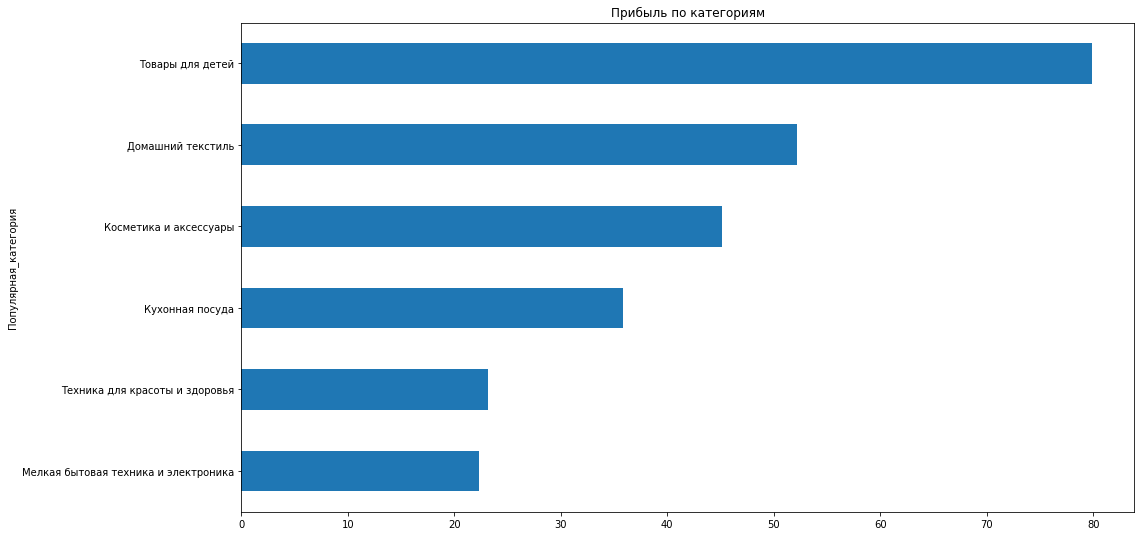

In [79]:
segment.groupby('Популярная_категория')['Прибыль'].sum().sort_values().plot(kind = 'barh', figsize = (16, 9),
title='Прибыль по категориям')

<AxesSubplot:title={'center':'Тип сервиса'}>

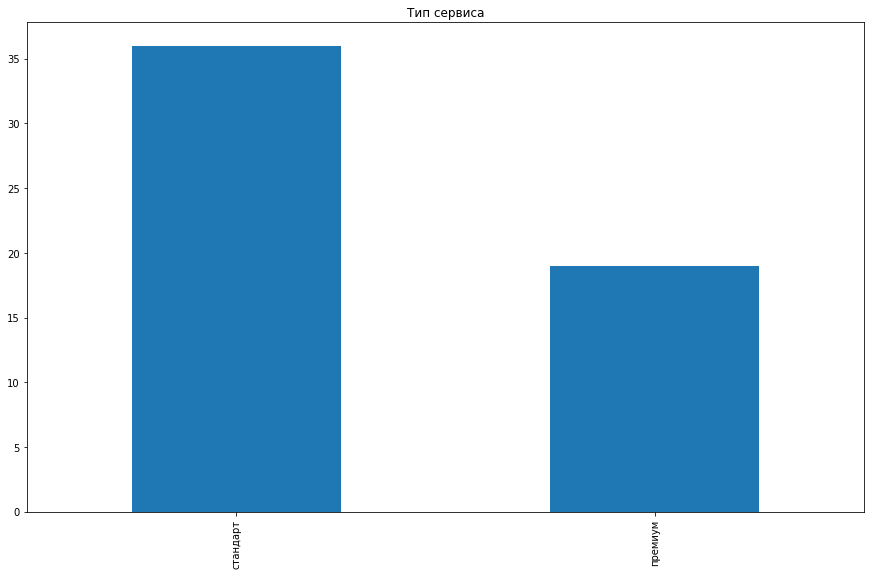

In [80]:
segment['Тип сервиса'].value_counts().plot(kind='bar', figsize=(15,9),title='Тип сервиса')

Для изучения была выбрана группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Потеря таких клиентов может означать потерю большой доли прибыли.  
Среди клиентов с высокой долей вероятности снижения покупательской активности и прибылью выше средней преобладают клиенты с стандартным типом сервиса, так же больше всего они тратят на товары категории "товары для детей". Их высокая вероятность снижения активности коррелирует наиболее с "минут_текущий_месяц", "Средний_просмотр_категорий_за_визит", "Неоплаченные_продукты_штук_квартал". Возможно дополнительные акции, скидки, специализированные предложения, более активное продвижение любимой категории в ленте, уведомления-напоминания о товаре находящимся в корзине помогут удержать покупательскую активность и не терять важных клиентов.

## Общий вывод  

Цель проекта: разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.  
  
1) Загрузка данных  
  
Загрузили библиотеки и файлы, объявили константы. Для изучения используется 4 датасета  

2) Предобработка данных  
  
Провели предобработку данных. Исправили ошибки в данных, проверили наличие дубликатов, проверили типы данных. Пропусков и дубликатов не было обнаружено.  

3) Исследовательский анализ данных  
  
Были построены графики для всех количественных и категориальных признаков для каждого датасета. Так же были проанализированы минимальные, максимальные, средние и медианные значения для каждого из количественных признаков, изучено соотношение для категориальных признаков. Ликвидирован один выброс.  

4) Объединение таблиц  
  
Объединены необходимые данные в один датасет Data.  

5) Корреляционный анализ  
  
Проведен корреляционный анализ. Мультиколлинерность отсутсвует. Было выявлено, что Покупательская активность наиболее взаимосвязана с Страниц_за_визит, минут_предыдущий_месяц и минут_текущий_месяц. Так же сильную взаимосвязь имеют признаки выручка_предыдущий_месяц и выручка_текущий_месяц.  

6) Использование пайплайнов  
  
На данном шаге были построены и использованы пайплайны. Метрикой была выбрана ROC-AUC. ROC-AUC устойчив к дисбалансу классов, потому что оценивает качество ранжирования вероятностей, а не просто количество правильно предсказанных классов. На RandomizedSearchCV было проведено 200 итераций с различными гиперпараметрами и среди моделей (DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVM) лучшей стала LogisticRegression с penalty='l1', C=8, solver='liblinear', StandardScaler, значение ROC-AUC на кросс-валидации 0.8962, что является хорошим результатом. На тестовых же данных модель продемонстрировала значение метрики равное 0.9158.  

7) Анализ важности признаков  
  
Наиболее важные признаки:  
Страниц_за_визит  
Средний_просмотр_категорий_за_визит  
Минут_предыдущий_месяц  
Наименее важные признаки:  
Маркет_актив_тек_мес  
Тип сервиса  
Разрешить сообщать_нет  
При принятии бизнес-решений компании стоит активнее изучать клиентов, которые много времени проводят на их сайте, т.к. Страниц_за_визит, Средний_просмотр_категорий_за_визит, Минут_предыдущий_месяц являются наиболее важными признаками, возможно, для таких клиентов стоит делать персонализированные предложения, так же можно заметить что Маркет_актив_тек_мес являтся самым малозначимым признаком, но Маркет_актив_6_мес имеется достаточно большое влияние, значит скорее всего присутствует лаг и со временем маркетинговые компании и рассылки начинают приносить свои плоды.  

8) Сегментация покупателей  
  
Для изучения была выбрана группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Потеря таких клиентов может означать потерю большой доли прибыли.  
Среди клиентов с высокой долей вероятности снижения покупательской активности и прибылью выше средней преобладают клиенты с стандартным типом сервиса, так же больше всего они тратят на товары категории "товары для детей". Их высокая вероятность снижения активности коррелирует наиболее с "минут_текущий_месяц", "Средний_просмотр_категорий_за_визит", "Неоплаченные_продукты_штук_квартал".      
  
  
Для увеличения покупательской активности клиентов компании стоит сосредоточиться на персонализации предложений. Особое внимание нужно уделить пользователям, которые проводят много времени на сайте, просматривают много страниц и категорий. Для них можно разработать систему персонализированных рекомендаций, предлагать скидки и бонусные программы. Важно использовать ремаркетинг через email и push-уведомления, напоминая клиентам о просмотренных товарах и товарах, оставленных в корзине, а также предлагать скидки в их любимых категориях, например, в товарах для детей.

Дополнительное внимание стоит уделить клиентам с высокой вероятностью снижения покупательской активности, особенно если они приносят компании значительную прибыль. Для таких клиентов можно разрабатывать специальные программы удержания: персонализированные скидки, бонусные предложения, лояльностные программы с кешбэком или накопительными скидками. Эксклюзивные предложения, такие как ранний доступ к акциям, помогут мотивировать их к повторным покупкам.        